In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import collections
import math
import random
import zipfile
import tensorflow as tf

C:\Users\sunilchawla\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from six.moves import urllib
from six.moves import xrange

In [3]:
os.getcwd()

'C:\\Users\\sunilchawla\\Desktop\\ass2\\code'

In [4]:
path = "../data_clean/"

In [5]:
df_train = pd.read_csv(path+"pos_neg.csv",sep = ",")
df_test = pd.read_csv(path+"pos_neg_test.csv",sep = ",")
df_train.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df_train.head()

,movieID,review,rate,label,words,words_sent
0,0,story of a man who has unnatural feelings for ...,3,0,"['story', 'man', 'unnatural', 'feeling', 'pig'...",story man unnatural feeling pig start opening ...
1,10000,airport '77 starts as a brand new luxury 747 p...,4,0,"['airport', ""'77"", 'start', 'brand', 'new', 'l...",airport '77 start brand new luxury 747 plane l...
2,10001,this film lacked something i could not put my ...,4,0,"['film', 'lacked', 'something', 'could', 'not'...",film lacked something could not put finger fir...
3,10002,"sorry everyone,,, i know this is supposed to b...",1,0,"['sorry', 'everyone', 'know', 'supposed', '``'...",sorry everyone know supposed art film wow ha...
4,10003,when i was little my parents took me along to ...,1,0,"['little', 'parent', 'took', 'along', 'theater...",little parent took along theater see interior ...


In [9]:
df_train['words_sent']=df_train['words_sent'].str.lower()
df_test['words_sent']=df_test['words_sent'].str.lower()
Y_train = df_train['label']
Y_test = df_test['label']

In [79]:
max_document_length_train = max([len(x.split(" ")) for x in df_test['words_sent']])
print(max_document_length_train)

1513


In [80]:
max_document_length_test = max([len(x.split(" ")) for x in df_test['words_sent']])
print(max_document_length_test)

1265


In [81]:
document_length_train = [len(x.split(" ")) for x in df_train['words_sent']]
document_length_test = [len(x.split(" ")) for x in df_test['words_sent']]

In [83]:
avg_words_per_review_train = []
avg_words_per_review_test = []

In [84]:
for i in document_length_train:
    avg_words_per_review_train.append(i/25000)
for i in document_length_test:
    avg_words_per_review_test.append(i/25000)

In [85]:
avg_words_per_review_test

[0.00352,
 0.00532,
 0.0046,
 0.00716,
 0.00572,
 0.00244,
 0.00324,
 0.00324,
 0.00324,
 0.00404,
 0.0026,
 0.006,
 0.0058,
 0.00224,
 0.00456,
 0.00472,
 0.00292,
 0.00492,
 0.008,
 0.00228,
 0.00192,
 0.00428,
 0.01268,
 0.00896,
 0.0056,
 0.00548,
 0.00456,
 0.01512,
 0.01236,
 0.0062,
 0.0032,
 0.00372,
 0.00876,
 0.00432,
 0.00712,
 0.0056,
 0.00564,
 0.00228,
 0.00744,
 0.00448,
 0.0028,
 0.00268,
 0.00368,
 0.00936,
 0.005,
 0.00284,
 0.01932,
 0.00228,
 0.00488,
 0.00344,
 0.00244,
 0.00588,
 0.00572,
 0.00136,
 0.00304,
 0.00268,
 0.01356,
 0.00068,
 0.00612,
 0.00364,
 0.00292,
 0.003,
 0.0038,
 0.00356,
 0.0086,
 0.00464,
 0.00228,
 0.00304,
 0.00244,
 0.00368,
 0.002,
 0.00116,
 0.00764,
 0.00076,
 0.01788,
 0.00516,
 0.00476,
 0.00364,
 0.00368,
 0.00404,
 0.00164,
 0.00272,
 0.00188,
 0.005,
 0.00456,
 0.00584,
 0.00208,
 0.0016,
 0.0038,
 0.00228,
 0.00204,
 0.00896,
 0.00244,
 0.0036,
 0.0098,
 0.00408,
 0.00384,
 0.0018,
 0.00088,
 0.00228,
 0.00296,
 0.00148,
 0.0058

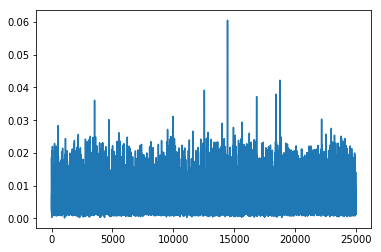

In [86]:
x = np.arange(0, 25000, 1);
y = avg_words_per_review_train
plt.plot(x, y)

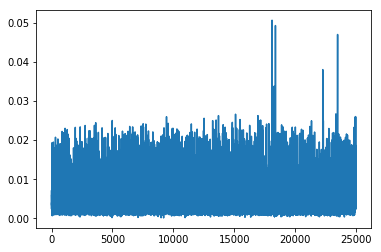

In [87]:
x = np.arange(0, 25000, 1);
y = avg_words_per_review_test
plt.plot(x, y)

In [88]:
MAX_SEQUENCE_LENGTH = 450

In [89]:
vocab_processor = tf.contrib.learn.preprocessing.VocabularyProcessor(MAX_SEQUENCE_LENGTH)

In [92]:
x_data_train = np.array(list(vocab_processor.fit_transform(df_train['words_sent'])))
y_output_train = np.array(Y_train)
vocabulary_size_train = len(vocab_processor.vocabulary_)

In [93]:
x_data_test = np.array(list(vocab_processor.fit_transform(df_test['words_sent'])))
y_output_test = np.array(Y_test)
vocabulary_size_test = len(vocab_processor.vocabulary_)

In [95]:
print(vocabulary_size_test)

90907


In [44]:
df_train['words_sent'][3:5]

3    sorry everyone know supposed  art  film wow ha...
4    little parent took along theater see interior ...
Name: words_sent, dtype: object

In [45]:
x_data[3:5]

array([[427, 428, 402, 429, 430, 189, 431, 432, 433, 434, 435, 228, 436,
        437, 179, 438, 185,   8, 317, 439, 370, 440,   1,  32, 441, 438,
        442, 443, 444, 445, 446, 262,  32, 447, 447, 438, 106, 435, 448,
        449, 450,  37, 106, 435, 451, 452, 453,  26, 454, 189, 455, 440,
        252, 456, 457, 458, 459,  98, 259, 192, 460, 461, 462, 463, 464,
          8, 465, 466, 467, 468,  27, 469, 470, 220,  49, 471, 180, 472,
        473, 473, 474, 293, 398, 475,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [97]:
np.random.seed(22)
shuffle_indices = np.random.permutation(np.arange(len(x_data_train)))
x_shuffled_train = x_data_train[shuffle_indices]
y_shuffled_train = y_output_train[shuffle_indices]

In [98]:
np.random.seed(22)
shuffle_indices = np.random.permutation(np.arange(len(x_data_test)))
x_shuffled_test = x_data_test[shuffle_indices]
y_shuffled_test = y_output_test[shuffle_indices]

In [99]:
train_data = x_shuffled_train
train_target = y_shuffled_train

test_data = x_shuffled_test
test_target = y_shuffled_test

In [100]:
tf.reset_default_graph()

x = tf.placeholder(tf.int32, [None, MAX_SEQUENCE_LENGTH])
y = tf.placeholder(tf.int32, [None])

In [101]:
num_epochs = 20
batch_size = 25
embedding_size = 50
max_label = 2

In [102]:
embedding_matrix = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
embeddings = tf.nn.embedding_lookup(embedding_matrix, x)

In [103]:
embedding_matrix

<tf.Variable 'Variable:0' shape=(90907, 50) dtype=float32_ref>

In [104]:
embeddings

<tf.Tensor 'embedding_lookup:0' shape=(?, 450, 50) dtype=float32>

In [105]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(embedding_size)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)

In [106]:
_, (encoding, _) = tf.nn.dynamic_rnn(lstmCell, embeddings, dtype=tf.float32)

In [107]:
encoding

<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 50) dtype=float32>

In [108]:
logits = tf.layers.dense(encoding, max_label, activation=None)

In [109]:
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(cross_entropy)

In [110]:
prediction = tf.equal(tf.argmax(logits, 1), tf.cast(y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [111]:
optimizer = tf.train.AdamOptimizer(0.01)
train_step = optimizer.minimize(loss)

In [112]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as session:
    init.run()
    
    for epoch in range(num_epochs):
        
        num_batches = int(len(train_data) // batch_size) + 1
        
        for i in range(num_batches):
            # Select train data
            min_ix = i * batch_size
            max_ix = np.min([len(train_data), ((i+1) * batch_size)])

            x_train_batch = train_data[min_ix:max_ix]
            y_train_batch = train_target[min_ix:max_ix]
            
            train_dict = {x: x_train_batch, y: y_train_batch}
            session.run(train_step, feed_dict=train_dict)
            
            train_loss, train_acc = session.run([loss, accuracy], feed_dict=train_dict)

        test_dict = {x: test_data, y: test_target}
        test_loss, test_acc = session.run([loss, accuracy], feed_dict=test_dict)    
        print('Epoch: {}, Test Loss: {:.2}, Test Acc: {:.5}'.format(epoch + 1, test_loss, test_acc)) 